**Part 1: Import Necessary Packages and check the data**

In [ ]:
import pandas as pd
import numpy as np
import io
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Read the csv
df= pd.read_csv('A1_heart_disease_dataset.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,state
0,63.0,M,tap,145.0,233.0,yes,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,M,asp,160.0,286.0,no,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,M,asp,120.0,229.0,no,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,M,nap,130.0,250.0,no,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,F,aap,130.0,204.0,no,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,M,tap,110.0,264.0,no,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1.0
299,68.0,M,asp,144.0,193.0,yes,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2.0
300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
301,57.0,F,aap,130.0,236.0,no,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1.0


In [ ]:
# 14 features
df.dtypes

age         float64
sex          object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
state       float64
dtype: object

In [ ]:
print(df.columns.tolist())

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'state']


In [ ]:
df.shape

(303, 14)

In [ ]:
# Check and match the rows/ indexes & columns: 303 rows, 14 columns
print('Number of rows in dataframe:', len(df.index))
print('Number of columns in dataframe:', len(df.columns))

Number of rows in dataframe: 303
Number of columns in dataframe: 14


In [ ]:
# We are checking number of 'na' in the entire dataset before filtering through 'state'
df.isna().sum()

age          8
sex          8
cp          11
trestbps     8
chol        10
fbs          8
restecg      8
thalach     12
exang        8
oldpeak      8
slope        8
ca          12
thal         8
state       10
dtype: int64

In [ ]:
# Remove the observations where heart disease are not diagnosed by Cardiologists, look at state
# Step 1: Draw the state column, and obtained there is 303 rows (BEFORE)
df[['state']]

,state
0,0.0
1,2.0
2,1.0
3,0.0
4,0.0
...,...
298,1.0
299,2.0
300,NaN
301,1.0


In [ ]:
# Step 2: Now we draw the state column which >0, and obtained 133 rows (AFTER); and 170 out of 303 are having no risk to the heart disease
filter_df=df[df['state']>=1]
print(filter_df)

      age sex   cp  trestbps   chol  ... oldpeak  slope   ca  thal  state
1    67.0   M  asp     160.0  286.0  ...     1.5    2.0  3.0   3.0    2.0
2    67.0   M  asp     120.0  229.0  ...     2.6    2.0  2.0   7.0    1.0
6    62.0   F  NaN     140.0  268.0  ...     3.6    3.0  2.0   3.0    3.0
8    63.0   M  asp     130.0  254.0  ...     1.4    2.0  1.0   7.0    2.0
9    53.0   M  asp     140.0  203.0  ...     3.1    3.0  0.0   7.0    1.0
..    ...  ..  ...       ...    ...  ...     ...    ...  ...   ...    ...
296  59.0   M  asp     164.0  176.0  ...     1.0    2.0  2.0   6.0    3.0
297  57.0   F  asp     140.0  241.0  ...     0.2    2.0  0.0   7.0    1.0
298  45.0   M  tap     110.0  264.0  ...     1.2    2.0  0.0   7.0    1.0
299  68.0   M  asp     144.0  193.0  ...     3.4    2.0  2.0   7.0    2.0
301  57.0   F  aap     130.0  236.0  ...     0.0    2.0  1.0   3.0    1.0

[133 rows x 14 columns]


In [ ]:
filter_df.shape

(133, 14)

**Part 2: Display the filtered data and modifying it**

In [ ]:
filter_df.isna().sum()

age         0
sex         0
cp          1
trestbps    0
chol        1
fbs         0
restecg     0
thalach     1
exang       0
oldpeak     0
slope       0
ca          1
thal        0
state       0
dtype: int64

In [ ]:
# We displayed the dataset based on the state > 1
# By using pd.set_options('display.max_rows') we are able to displayed all the data that do not showed in the previous data
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(filter_df)

      age sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
1    67.0   M  asp     160.0  286.0   no      2.0    108.0    1.0      1.5   
2    67.0   M  asp     120.0  229.0   no      2.0    129.0    1.0      2.6   
6    62.0   F  NaN     140.0  268.0   no      2.0    160.0    0.0      3.6   
8    63.0   M  asp     130.0  254.0   no      2.0    147.0    0.0      1.4   
9    53.0   M  asp     140.0  203.0  yes      2.0    155.0    1.0      3.1   
12   56.0   M  nap     130.0  256.0  yes      2.0    142.0    1.0      0.6   
22   58.0   M  aap     120.0  284.0   no      2.0    160.0    0.0      1.8   
23   58.0   M  nap     132.0  224.0   no      2.0    173.0    0.0      3.2   
24   60.0   M  asp     130.0  206.0   no      2.0    132.0    1.0      2.4   
29   40.0   M  asp     110.0  167.0   no      2.0    114.0    1.0      2.0   
31   60.0   M  asp     117.0  230.0  yes      0.0    160.0    1.0      1.4   
32   64.0   M  nap     140.0  335.0   no      0.0    158.0    0.

In [ ]:
# The median of features BEFORE removing any data.
filter_df.median()

age          58.0
trestbps    130.0
chol        253.5
restecg       2.0
thalach     142.0
exang         1.0
oldpeak       1.4
slope         2.0
ca            1.0
thal          7.0
state         2.0
dtype: float64

In [ ]:
# Remove row 6 due to 'NA' value in cp column
filter_df= filter_df.drop([6])
filter_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,state
1,67.0,M,asp,160.0,286.0,no,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,M,asp,120.0,229.0,no,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
8,63.0,M,asp,130.0,254.0,no,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2.0
9,53.0,M,asp,140.0,203.0,yes,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1.0
12,56.0,M,nap,130.0,256.0,yes,2.0,142.0,1.0,0.6,2.0,1.0,6.0,2.0
22,58.0,M,aap,120.0,284.0,no,2.0,160.0,0.0,1.8,2.0,0.0,3.0,1.0
23,58.0,M,nap,132.0,224.0,no,2.0,173.0,0.0,3.2,1.0,2.0,7.0,3.0
24,60.0,M,asp,130.0,206.0,no,2.0,132.0,1.0,2.4,2.0,2.0,7.0,4.0
29,40.0,M,asp,110.0,167.0,no,2.0,114.0,1.0,2.0,2.0,0.0,7.0,3.0
31,60.0,M,asp,117.0,230.0,yes,0.0,160.0,1.0,1.4,1.0,2.0,7.0,2.0


In [ ]:
# Recheck the dimension
filter_df.shape

(132, 14)

In [ ]:
# Replacing missing value with minimum value
features= ['age', 'trestbps', 'chol', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'state']
filter_df[features]= filter_df[features].fillna(value= filter_df.min())
filter_df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
state       0
dtype: int64

In [ ]:
# The median of features AFTER replacing the data
filter_df.median()

age          58.0
trestbps    130.0
chol        251.0
restecg       2.0
thalach     142.0
exang         1.0
oldpeak       1.4
slope         2.0
ca            1.0
thal          7.0
state         2.0
dtype: float64

In [ ]:
filter_df.shape

(132, 14)

**Part 3: Is there any change of data??**

In [ ]:
filter_df.dtypes

age         float64
sex          object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
state       float64
dtype: object

**Part 4: Total number and ratio of M & F who are in high risk in Heart Disease**

In [ ]:
# Filter the Male from filter dataframe and calculate number of Male expose to risk of heart disease
Male= filter_df[filter_df['sex']=='M']
Male

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,state
1,67.0,M,asp,160.0,286.0,no,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,M,asp,120.0,229.0,no,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
8,63.0,M,asp,130.0,254.0,no,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2.0
9,53.0,M,asp,140.0,203.0,yes,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1.0
12,56.0,M,nap,130.0,256.0,yes,2.0,142.0,1.0,0.6,2.0,1.0,6.0,2.0
22,58.0,M,aap,120.0,284.0,no,2.0,160.0,0.0,1.8,2.0,0.0,3.0,1.0
23,58.0,M,nap,132.0,224.0,no,2.0,173.0,0.0,3.2,1.0,2.0,7.0,3.0
24,60.0,M,asp,130.0,206.0,no,2.0,132.0,1.0,2.4,2.0,2.0,7.0,4.0
29,40.0,M,asp,110.0,167.0,no,2.0,114.0,1.0,2.0,2.0,0.0,7.0,3.0
31,60.0,M,asp,117.0,230.0,yes,0.0,160.0,1.0,1.4,1.0,2.0,7.0,2.0


In [ ]:
# Male Count
Male_count= filter_df[filter_df['sex']=='M'].count()
Male_count

age         110
sex         110
cp          110
trestbps    110
chol        110
fbs         110
restecg     110
thalach     110
exang       110
oldpeak     110
slope       110
ca          110
thal        110
state       110
dtype: int64

In [ ]:
# Find the shape
Male.shape

(110, 14)

In [ ]:
# Filter the male from filter dataframe and calculate number of Male expose to risk of heart disease
Female= filter_df[filter_df['sex']=='F']
Female

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,state
40,65.0,F,asp,150.0,225.0,no,2.0,114.0,0.0,1.0,2.0,3.0,7.0,4.0
44,61.0,F,asp,130.0,330.0,no,2.0,169.0,0.0,0.0,1.0,0.0,3.0,1.0
60,51.0,F,asp,130.0,305.0,no,0.0,142.0,1.0,1.2,2.0,0.0,7.0,2.0
91,62.0,F,asp,160.0,164.0,no,2.0,145.0,0.0,6.2,3.0,3.0,7.0,3.0
97,60.0,F,asp,150.0,258.0,no,2.0,157.0,0.0,2.6,2.0,2.0,7.0,3.0
110,61.0,F,asp,145.0,307.0,no,2.0,146.0,1.0,1.0,2.0,0.0,7.0,1.0
113,43.0,F,asp,132.0,341.0,yes,2.0,136.0,1.0,3.0,2.0,0.0,7.0,2.0
121,63.0,F,asp,150.0,407.0,no,2.0,154.0,0.0,4.0,2.0,3.0,7.0,4.0
126,56.0,F,asp,200.0,288.0,yes,2.0,133.0,1.0,4.0,3.0,2.0,7.0,3.0
172,59.0,F,asp,174.0,249.0,no,0.0,143.0,1.0,0.0,2.0,0.0,3.0,1.0


In [ ]:
# Female Count
Female_count= filter_df[filter_df['sex']=='F'].count()
Female_count

age         22
sex         22
cp          22
trestbps    22
chol        22
fbs         22
restecg     22
thalach     22
exang       22
oldpeak     22
slope       22
ca          22
thal        22
state       22
dtype: int64

In [ ]:
# Find the shape
Female.shape

(22, 14)

In [ ]:
# Compute the ratio
#Compute the total number
Sum= filter_df['sex'].count()
Sum

# Calculate Male Ratio (Still need some work)
Female_ratio=('[Male]/[Sum]')
Female_ratio

# Calculate Male Ratio (Still need some work)
Female_ratio=('[Male]/[Sum]')
Female_ratio

'[Male]/[Sum]'

In [ ]:
Male.count()

age         110
sex         110
cp          110
trestbps    110
chol        110
fbs         110
restecg     110
thalach     110
exang       110
oldpeak     110
slope       110
ca          110
thal        110
state       110
dtype: int64

**Part 5: Is there any association between heart rate & severity of heart disease?**

In [ ]:
# Comparing the relationship (correlation) between thalach (max heart rate) & state (1-4)
thalach= filter_df['thalach']
state= filter_df['state']
correlation= thalach.corr(state)
correlation

-0.17098539347609237

In [ ]:
# Explaination of correlation:
## Given the calculated negative correlation of -0.1710 between max heart rate to the risk of heart disease, it can be conclude that heart rate has low relationship to the risk of heart disease.

**Part 6: Print average cholesterol level for different number of blocked blood vessels across gender. Report the pattern.**

In [ ]:
# Print average cholesterol level to number of vessels impacted
# Compute Male with 0 affected vessel
Zero_vessel= Male[Male['ca']== 0]
Zero_vessel

# Calculating the average cholesterol of Male with 0 vessel impacted
Sum_of_chol_M0= Zero_vessel['chol'].sum()
Sum_of_chol_M0

Num_of_chol_M0= len(Zero_vessel)
Num_of_chol_M0

Sum_of_chol_M0/Num_of_chol_M0

243.78378378378378

In [ ]:
# Checking the row/ shape of Male with 0 numbers of vessels impacted
Zero_vessel.shape

(37, 14)

In [ ]:
# Print average cholesterol level to number of vessels impacted
# Compute Male with 1 affected vessel
One_vessel= Male[Male['ca']== 1]
One_vessel

# Calculating the average cholesterol of Male with 0 vessel impacted
Sum_of_chol_M1= One_vessel['chol'].sum()
Sum_of_chol_M1

Num_of_chol_M1= len(One_vessel)
Num_of_chol_M1

Sum_of_chol_M1/Num_of_chol_M1

243.0

In [ ]:
One_vessel.shape

(39, 14)

In [ ]:
# Print average cholesterol level to number of vessels impacted
# Compute Male with 2 affected vessel
Two_vessel= Male[Male['ca']== 2]
Two_vessel

# Calculating the average cholesterol of Male with 0 vessel impacted
Sum_of_chol_M2= Two_vessel['chol'].sum()
Sum_of_chol_M2

Num_of_chol_M2= len(Two_vessel)
Num_of_chol_M2

Sum_of_chol_M2/Num_of_chol_M2

243.72727272727272

In [ ]:
Two_vessel.shape

(22, 14)

In [ ]:
# Print average cholesterol level to number of vessels impacted
# Compute Male with 3 affected vessel
Three_vessel= Male[Male['ca']== 3]
Three_vessel

# Calculating the average cholesterol of Male with 0 vessel impacted
Sum_of_chol_M3= Three_vessel['chol'].sum()
Sum_of_chol_M3

Num_of_chol_M3= len(Three_vessel)
Num_of_chol_M3

Sum_of_chol_M3/Num_of_chol_M3

271.9166666666667

In [ ]:
Three_vessel.shape

(12, 14)

In [ ]:
# Print average cholesterol level to number of vessels impacted
# Compute Female with 0 affected vessel
Zero_vessel0= Female[Female['ca']== 0]
Zero_vessel0

# Calculating the average cholesterol of Male with 0 vessel impacted
Sum_of_chol_F0= Zero_vessel0['chol'].sum()
Sum_of_chol_F0

Num_of_chol_F0= len(Zero_vessel0)
Num_of_chol_F0

Sum_of_chol_F0/Num_of_chol_F0

284.6

In [ ]:
Zero_vessel0.shape

(10, 14)

In [ ]:
# Print average cholesterol level to number of vessels impacted
# Compute Female with 1 affected vessel
One_vessel1= Female[Female['ca']== 1]
One_vessel1

# Calculating the average cholesterol of Male with 0 vessel impacted
Sum_of_chol_F1= One_vessel1['chol'].sum()
Sum_of_chol_F1

Num_of_chol_F1= len(One_vessel1)
Num_of_chol_F1

Sum_of_chol_F1/Num_of_chol_F1

220.5

In [ ]:
One_vessel1.shape

(2, 14)

In [ ]:
# Print average cholesterol level to number of vessels impacted
# Compute Female with 2 affected vessel
Two_vessel2= Female[Female['ca']== 2]
Two_vessel2

# Calculating the average cholesterol of Male with 0 vessel impacted
Sum_of_chol_F2= Two_vessel2['chol'].sum()
Sum_of_chol_F2

Num_of_chol_F2= len(Two_vessel2)
Num_of_chol_F2

Sum_of_chol_F2/Num_of_chol_F2

294.6666666666667

In [ ]:
Two_vessel2.shape

(6, 14)

In [ ]:
# Print average cholesterol level to number of vessels impacted
# Compute Female with 3 affected vessel
Three_vessel3= Female[Female['ca']== 3]
Three_vessel3

# Calculating the average cholesterol of Male with 0 vessel impacted
Sum_of_chol_F3= Three_vessel3['chol'].sum()
Sum_of_chol_F3

Num_of_chol_F3= len(Three_vessel3)
Num_of_chol_F3

Sum_of_chol_F3/Num_of_chol_F3

272.5

In [ ]:
Three_vessel3.shape

(4, 14)

In [ ]:
# Please report the pattern
## Summarizing the output
## It can be summarize that male cholesterol level stay stable in the range 243 to 244 given 0,1 and 2 vessels blocked.
## Noticeable that male cholesterol level for 3 numbers of vessels blocked is considered high, given the cholesterol level is at 271.92.
## In contrast, female cholesterol level is relatively volatile comparing to male. This can be impact by the external factors that do not included in the task.
## Eg: Lifestyle and habit


**Part 7: Print % of patients at risk of Heart Disease having abnormality in both ECG & blood sugar with asymptomatic chest pain**

In [ ]:
# Print abnormality in both ECG & BLOOD SUGAR
# fbs: yes/ TRUE & restecg: 1 & 2 with asymptomatic chest pain (referring to asp at cp)

# Filter asympomatic chest pain from dataframe
ASP= filter_df[filter_df['cp']== 'asp']
ASP

# Filter abnormality of Blood Sugar (YES)
Abnormality_fbs= ASP[ASP['fbs']== 'yes']
Abnormality_fbs

#Filter restecg of 1 and 2(ECG)
Abnormality_RESTECG= Abnormality_fbs[Abnormality_fbs['restecg']== 2.0]
Abnormality_RESTECG

#Print the % of patient risk at both ECG & Blood Sugar with ASP based on filter_df
Num_of_ASP= len(Abnormality_RESTECG)
Num_of_ASP

Num_of_HDR= len(filter_df)
Num_of_HDR

Risk_of_Patient= Num_of_ASP/Num_of_HDR
Risk_of_Patient

# Convert the decimal place into % in 2 decimals place
percentage_of_patients_risk_to_HDR_ECG_FBS= "{:.2%}".format(Risk_of_Patient)
print(percentage_of_patients_risk_to_HDR_ECG_FBS)

8.33%


In [ ]:
ASP.shape

(101, 14)

In [ ]:
Abnormality_fbs.shape

(16, 14)

In [ ]:
Abnormality_RESTECG.shape

(11, 14)

**Part 8: Calculate average blood pressure of all observation with non- flat ST slope of ECG**

In [ ]:
# Non-Flat ST slope of ECG, print 1 (Up- slopping)and 3 (Dowb- slopping) in slope
# Filter 1 and 3 out from the filter_df

# Calculate upward- sloping from the dataframe, filter_df
Up_slopping= filter_df[filter_df['slope']== 1]
Up_slopping

# Calculate the average blood pressure (trestbps)
Average_Blood_Pressure_Up= Up_slopping['trestbps'].mean()
Average_Blood_Pressure_Up

131.05555555555554

In [ ]:
# Calculate downward-slopping from the dataframe, filter_df
Down_slopping= filter_df[filter_df['slope']== 3]
Down_slopping

# Calculate the average blood pressure (trestbps)
Average_Blood_Pressure_Down= Down_slopping['trestbps'].mean()
Average_Blood_Pressure_Down


143.9

**Part 9: Create & Print a dataframe of the heart rate, blood pressure, cholesterol, for different age groups (based on 10 years interval)**

In [ ]:
# Creating age subgroup for the dataset
Age31_40=filter_df[(filter_df.age>= 31) & (filter_df.age<= 40)]
Age41_50=filter_df[(filter_df.age>= 41) & (filter_df.age<= 50)]
Age51_60=filter_df[(filter_df.age>= 51) & (filter_df.age<= 60)]
Age61_70=filter_df[(filter_df.age>= 61) & (filter_df.age<= 70)]
Age71_80=filter_df[(filter_df.age>= 71) & (filter_df.age<= 80)]
Age81_90=filter_df[(filter_df.age>= 81) & (filter_df.age<= 90)]
Age91_100=filter_df[(filter_df.age>= 91) & (filter_df.age<= 100)]

In [ ]:
# Print the different age subgroup
# Print age 31 to 40
Age31_40=filter_df[(filter_df.age>= 31) & (filter_df.age<= 40)]
Age31_40

# Draw heart rate (thalach), blood pressure (trestbps) & cholesterol (chol)
Age31_Age40= Age31_40[['age', 'thalach', 'trestbps', 'chol']]
Age31_Age40

,age,thalach,trestbps,chol
29,40.0,114.0,110.0,167.0
109,39.0,140.0,118.0,219.0
138,35.0,130.0,120.0,198.0
168,35.0,156.0,126.0,282.0
211,38.0,182.0,120.0,231.0
268,40.0,181.0,152.0,223.0


In [ ]:
# Number of patients
index31_40= Age31_Age40.index
Num_of_rows31_40= len(index31_40)
print(Num_of_rows31_40)

6


In [ ]:
# Recheck the number of patients
Age31_Age40.count()

age         6
thalach     6
trestbps    6
chol        6
dtype: int64

In [ ]:
# Print age 41 to 50
Age41_50=filter_df[(filter_df.age>= 41) & (filter_df.age<= 50)]
Age41_50

# Draw heart rate (thalach), blood pressure (trestbps) & cholesterol (chol)
Age41_Age50= Age41_50[['age', 'thalach', 'trestbps', 'chol']]
Age41_Age50

,age,thalach,trestbps,chol
36,43.0,120.0,120.0,177.0
47,50.0,128.0,150.0,243.0
52,44.0,153.0,112.0,290.0
56,50.0,163.0,140.0,233.0
57,41.0,158.0,110.0,172.0
69,46.0,147.0,150.0,231.0
74,44.0,177.0,110.0,197.0
104,49.0,139.0,120.0,188.0
113,43.0,136.0,132.0,341.0
120,48.0,150.0,130.0,256.0


In [ ]:
# Number of patients
index41_50= Age41_Age50.index
Num_of_rows41_50= len(index41_50)
print(Num_of_rows41_50)

22


In [ ]:
# Recheck the number of patients
Age41_Age50.count()

age         22
thalach     22
trestbps    22
chol        22
dtype: int64

In [ ]:
# Print age 51 to 60
Age51_60=filter_df[(filter_df.age>= 51) & (filter_df.age<= 60)]
Age51_60

# Draw heart rate (thalach), blood pressure (trestbps) & cholesterol (chol)
Age51_Age60= Age51_60[['age', 'thalach', 'trestbps', 'chol', 'sex']]
Age51_Age60

,age,thalach,trestbps,chol,sex
9,53.0,155.0,140.0,203.0,M
12,56.0,142.0,130.0,256.0,M
22,58.0,160.0,120.0,284.0,M
23,58.0,173.0,132.0,224.0,M
24,60.0,132.0,130.0,206.0,M
31,60.0,160.0,117.0,230.0,M
37,57.0,112.0,150.0,276.0,M
38,55.0,132.0,132.0,353.0,M
45,58.0,165.0,112.0,230.0,M
54,60.0,144.0,130.0,253.0,M


In [ ]:
# Number of patients
index51_60= Age51_Age60.index
Num_of_rows51_60= len(index51_60)
print(Num_of_rows51_60)

64


In [ ]:
Age51_Age60.count()

age         64
thalach     64
trestbps    64
chol        64
sex         64
dtype: int64

In [ ]:
# Print age 61 to 70
Age61_70=filter_df[(filter_df.age>= 61) & (filter_df.age<= 70)]
Age61_70

# Draw heart rate (thalach), blood pressure (trestbps) & cholesterol (chol)
Age61_Age70= Age61_70[['age', 'thalach', 'trestbps', 'chol', 'sex']]
Age61_Age70

,age,thalach,trestbps,chol,sex
1,67.0,108.0,160.0,286.0,M
2,67.0,129.0,120.0,229.0,M
8,63.0,147.0,130.0,254.0,M
32,64.0,158.0,140.0,335.0,M
40,65.0,114.0,150.0,225.0,F
44,61.0,169.0,130.0,330.0,F
71,67.0,163.0,125.0,254.0,M
72,62.0,99.0,120.0,267.0,M
73,65.0,158.0,110.0,248.0,M
83,68.0,150.0,180.0,274.0,M


In [ ]:
# Number of patients
index61_70= Age61_Age70.index
Num_of_rows61_70= len(index61_70)
print(Num_of_rows61_70)

39


In [ ]:
# Recheck number of patients
Age61_Age70.count()

age         39
thalach     39
trestbps    39
chol        39
sex         39
dtype: int64

In [ ]:
# Print age 71 to 80
Age71_80=filter_df[(filter_df.age>= 71) & (filter_df.age<= 80)]
Age71_80

# Draw heart rate (thalach), blood pressure (trestbps) & cholesterol (chol)
Age71_Age80= Age71_80[['age', 'thalach', 'trestbps', 'chol','sex']]
Age71_Age80

,age,thalach,trestbps,chol,sex
161,77.0,162.0,125.0,304.0,M


In [ ]:
# Number of patients
index71_80= Age71_Age80.index
Num_of_rows71_80= len(index71_80)
print(Num_of_rows71_80)

1


In [ ]:
# Recheck the number of patients
Age71_Age80.count()

age         1
thalach     1
trestbps    1
chol        1
sex         1
dtype: int64

**Part 10: Find the average cholesterol level of across gender for each age group. Explain the result.**


In [ ]:
# Male Age Group between 31 to 40
Male_Age31_40= Male[(Male.age>=31) & (Male.age<= 40)]
Male_Age31_40

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,state
29,40.0,M,asp,110.0,167.0,no,2.0,114.0,1.0,2.0,2.0,0.0,7.0,3.0
109,39.0,M,asp,118.0,219.0,no,0.0,140.0,0.0,1.2,2.0,0.0,7.0,3.0
138,35.0,M,asp,120.0,198.0,no,0.0,130.0,1.0,1.6,2.0,0.0,7.0,1.0
168,35.0,M,asp,126.0,282.0,no,2.0,156.0,1.0,0.0,1.0,0.0,7.0,1.0
211,38.0,M,tap,120.0,231.0,no,0.0,182.0,1.0,3.8,2.0,0.0,7.0,4.0
268,40.0,M,asp,152.0,223.0,no,0.0,181.0,0.0,0.0,1.0,0.0,7.0,1.0


In [ ]:
# Sum of cholesterol for age 31 to 40
CholM_31_40= Male_Age31_40['chol'].sum()
CholM_31_40

# Count of age 31 to 40
Num_of_M_Chol_31_40= Male_Age31_40['chol'].count()
Num_of_M_Chol_31_40

# Find the average of cholesterol level
Average_chol_M31_40= CholM_31_40/ Num_of_M_Chol_31_40
Average_chol_M31_40

220.0

In [ ]:
# Male Age Group between 41 to 50
Male_Age41_50= Male[(Male.age>=41) & (Male.age<= 50)]
Male_Age41_50

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,state
36,43.0,M,asp,120.0,177.0,no,2.0,120.0,1.0,2.5,2.0,0.0,7.0,3.0
47,50.0,M,asp,150.0,243.0,no,2.0,128.0,0.0,2.6,2.0,0.0,7.0,4.0
52,44.0,M,asp,112.0,290.0,no,2.0,153.0,0.0,0.0,1.0,1.0,3.0,2.0
56,50.0,M,nap,140.0,233.0,no,0.0,163.0,0.0,0.6,2.0,1.0,7.0,1.0
57,41.0,M,asp,110.0,172.0,no,2.0,158.0,0.0,0.0,1.0,0.0,7.0,1.0
69,46.0,M,nap,150.0,231.0,no,0.0,147.0,0.0,3.6,2.0,0.0,3.0,1.0
74,44.0,M,asp,110.0,197.0,no,2.0,177.0,0.0,0.0,1.0,1.0,3.0,1.0
104,49.0,M,nap,120.0,188.0,no,0.0,139.0,0.0,2.0,2.0,3.0,7.0,3.0
120,48.0,M,asp,130.0,256.0,yes,2.0,150.0,1.0,0.0,1.0,2.0,7.0,3.0
145,47.0,M,nap,108.0,243.0,no,0.0,152.0,0.0,0.0,1.0,0.0,3.0,1.0


In [ ]:
# Sum of cholesterol for age 41 to 50
CholM_41_50= Male_Age41_50['chol'].sum()
CholM_41_50

# Count of age 41 to 50
Num_of_M_Chol_41_50= Male_Age41_50['chol'].count()
Num_of_M_Chol_41_50

# Find the average of cholesterol level
Average_chol_M41_50= CholM_41_50/ Num_of_M_Chol_41_50
Average_chol_M41_50

237.71428571428572

In [ ]:
# Male Age Group between 51 to 60
Male_Age51_60= Male[(Male.age>=51) & (Male.age<= 60)]
Male_Age51_60

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,state
9,53.0,M,asp,140.0,203.0,yes,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1.0
12,56.0,M,nap,130.0,256.0,yes,2.0,142.0,1.0,0.6,2.0,1.0,6.0,2.0
22,58.0,M,aap,120.0,284.0,no,2.0,160.0,0.0,1.8,2.0,0.0,3.0,1.0
23,58.0,M,nap,132.0,224.0,no,2.0,173.0,0.0,3.2,1.0,2.0,7.0,3.0
24,60.0,M,asp,130.0,206.0,no,2.0,132.0,1.0,2.4,2.0,2.0,7.0,4.0
31,60.0,M,asp,117.0,230.0,yes,0.0,160.0,1.0,1.4,1.0,2.0,7.0,2.0
37,57.0,M,asp,150.0,276.0,no,2.0,112.0,1.0,0.6,2.0,1.0,6.0,1.0
38,55.0,M,asp,132.0,353.0,no,0.0,132.0,1.0,1.2,2.0,1.0,7.0,3.0
45,58.0,M,nap,112.0,230.0,no,2.0,165.0,0.0,2.5,2.0,1.0,7.0,4.0
54,60.0,M,asp,130.0,253.0,no,0.0,144.0,1.0,1.4,1.0,1.0,7.0,1.0


In [ ]:
# Sum of cholesterol for age 51 to 60
CholM_51_60= Male_Age51_60['chol'].sum()
CholM_51_60

# Count of age 51 to 60
Num_of_M_Chol_51_60= Male_Age51_60['chol'].count()
Num_of_M_Chol_51_60

# Find the average of cholesterol level
Average_chol_M51_60= CholM_51_60/ Num_of_M_Chol_51_60
Average_chol_M51_60

250.30769230769232

In [ ]:
# Male Age Group between 61 to 70
Male_Age61_70= Male[(Male.age>=61) & (Male.age<= 70)]
Male_Age61_70

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,state
1,67.0,M,asp,160.0,286.0,no,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,M,asp,120.0,229.0,no,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
8,63.0,M,asp,130.0,254.0,no,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2.0
32,64.0,M,nap,140.0,335.0,no,0.0,158.0,0.0,0.0,1.0,0.0,3.0,1.0
71,67.0,M,asp,125.0,254.0,yes,0.0,163.0,0.0,0.2,2.0,2.0,7.0,3.0
72,62.0,M,asp,120.0,267.0,no,0.0,99.0,1.0,1.8,2.0,2.0,7.0,1.0
73,65.0,M,asp,110.0,248.0,no,2.0,158.0,0.0,0.6,1.0,2.0,6.0,1.0
83,68.0,M,nap,180.0,274.0,yes,2.0,150.0,1.0,1.6,2.0,0.0,7.0,3.0
108,61.0,M,asp,120.0,260.0,no,0.0,140.0,1.0,3.6,2.0,1.0,7.0,2.0
118,63.0,M,asp,130.0,330.0,yes,2.0,132.0,1.0,1.8,1.0,3.0,7.0,3.0


In [ ]:
# Sum of cholesterol for age 61 to 70
CholM_61_70= Male_Age61_70['chol'].sum()
CholM_61_70

# Count of age 61 to 70
Num_of_M_Chol_61_70= Male_Age61_70['chol'].count()
Num_of_M_Chol_61_70

# Find the average of cholesterol level
Average_chol_M61_70= CholM_61_70/ Num_of_M_Chol_61_70
Average_chol_M61_70

249.66666666666666

In [ ]:
# Male Age Group between 71 to 80
Male_Age71_80= Male[(Male.age>=71) & (Male.age<= 80)]
Male_Age71_80

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,state
161,77.0,M,asp,125.0,304.0,no,2.0,162.0,1.0,0.0,1.0,3.0,3.0,4.0


In [ ]:
# Sum of cholesterol for age 71 to 80
CholM_71_80= Male_Age71_80['chol'].sum()
CholM_71_80

# Count of age 71 to 80
Num_of_M_Chol_71_80= Male_Age71_80['chol'].count()
Num_of_M_Chol_71_80

# Find the average of cholesterol level
Average_chol_M71_80= CholM_71_80/ Num_of_M_Chol_71_80
Average_chol_M71_80

304.0

In [ ]:
# Female Age Group between 41 to 50
Female_Age41_50= Female[(Female.age>=41) & (Female.age<= 50)]
Female_Age41_50

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,state
113,43.0,F,asp,132.0,341.0,yes,2.0,136.0,1.0,3.0,2.0,0.0,7.0,2.0


In [ ]:
# Sum of cholesterol for age 41 to 50
CholF_41_50= Female_Age41_50['chol'].sum()
CholF_41_50

# Count of age 71 to 80
Num_of_F_Chol_41_50= Female_Age41_50['chol'].count()
Num_of_F_Chol_41_50

# Find the average of cholesterol level
Average_chol_F41_50= CholF_41_50/ Num_of_F_Chol_41_50
Average_chol_F41_50

341.0

In [ ]:
# Female Age Group between 51 to 60
Female_Age51_60= Female[(Female.age>=51) & (Female.age<= 60)]
Female_Age51_60

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,state
60,51.0,F,asp,130.0,305.0,no,0.0,142.0,1.0,1.2,2.0,0.0,7.0,2.0
97,60.0,F,asp,150.0,258.0,no,2.0,157.0,0.0,2.6,2.0,2.0,7.0,3.0
126,56.0,F,asp,200.0,288.0,yes,2.0,133.0,1.0,4.0,3.0,2.0,7.0,3.0
172,59.0,F,asp,174.0,249.0,no,0.0,143.0,1.0,0.0,2.0,0.0,3.0,1.0
181,56.0,F,asp,134.0,409.0,no,2.0,150.0,1.0,1.9,2.0,2.0,7.0,2.0
184,60.0,F,asp,158.0,305.0,no,2.0,161.0,0.0,0.0,1.0,0.0,3.0,1.0
231,55.0,F,asp,180.0,327.0,no,1.0,117.0,1.0,3.4,2.0,0.0,3.0,2.0
261,58.0,F,aap,136.0,319.0,yes,2.0,152.0,0.0,0.0,1.0,2.0,3.0,3.0
282,55.0,F,asp,128.0,205.0,no,1.0,130.0,1.0,2.0,2.0,1.0,7.0,3.0
286,58.0,F,asp,170.0,225.0,yes,2.0,146.0,1.0,2.8,2.0,2.0,6.0,2.0


In [ ]:
# Sum of cholesterol for age 51 to 60
CholF_51_60= Female_Age51_60['chol'].sum()
CholF_51_60

# Count of age 51 to 60
Num_of_F_Chol_51_60= Female_Age51_60['chol'].count()
Num_of_F_Chol_51_60

# Find the average of cholesterol level
Average_chol_F51_60= CholF_51_60/ Num_of_F_Chol_51_60
Average_chol_F51_60

280.5833333333333

In [ ]:
# Female Age Group between 61 to 70
Female_Age61_70= Female[(Female.age>=61) & (Female.age<= 70)]
Female_Age61_70

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,state
40,65.0,F,asp,150.0,225.0,no,2.0,114.0,0.0,1.0,2.0,3.0,7.0,4.0
44,61.0,F,asp,130.0,330.0,no,2.0,169.0,0.0,0.0,1.0,0.0,3.0,1.0
91,62.0,F,asp,160.0,164.0,no,2.0,145.0,0.0,6.2,3.0,3.0,7.0,3.0
110,61.0,F,asp,145.0,307.0,no,2.0,146.0,1.0,1.0,2.0,0.0,7.0,1.0
121,63.0,F,asp,150.0,407.0,no,2.0,154.0,0.0,4.0,2.0,3.0,7.0,4.0
193,62.0,F,asp,138.0,294.0,yes,0.0,106.0,0.0,1.9,2.0,3.0,3.0,2.0
209,62.0,F,asp,150.0,244.0,no,0.0,154.0,1.0,1.4,2.0,0.0,3.0,1.0
224,63.0,F,asp,108.0,269.0,no,0.0,169.0,1.0,1.8,2.0,2.0,3.0,1.0
294,63.0,F,asp,124.0,197.0,no,0.0,136.0,1.0,0.0,2.0,0.0,3.0,1.0


In [ ]:
# Sum of cholesterol for age 61 to 70
CholF_61_70= Female_Age61_70['chol'].sum()
CholF_61_70

# Count of age 61 to 70
Num_of_F_Chol_61_70= Female_Age61_70['chol'].count()
Num_of_F_Chol_61_70

# Find the average of cholesterol level
Average_chol_F61_70= CholF_61_70/ Num_of_F_Chol_61_70
Average_chol_F61_70

270.77777777777777

**Part 11: Draw 2 scatter plot on cholesterol level againts blood pressure and heart rate. Draw them into 2 subpoints of the same plot**

In [ ]:
# Draw scatter plot of cholesterol to blood pressure regardless the sex
# Print the particular column data (chol, threstbps, thalach)
Chol_Filter_df= filter_df[['chol']]
Chol_Filter_df

BP= filter_df[['trestbps']]
BP

HR= filter_df[['thalach']]
HR

,thalach
1,108.0
2,129.0
8,147.0
9,155.0
12,142.0
22,160.0
23,173.0
24,132.0
29,114.0
31,160.0


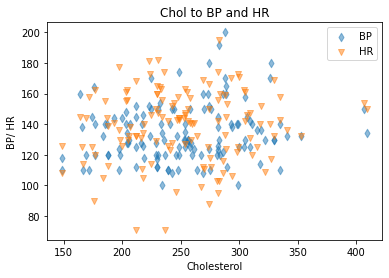

In [ ]:
# Draw the scatter plot of HR and BP to Cholesterol
plt.scatter(x= Chol_Filter_df, y= BP,
            alpha= 0.5, marker= 'd')
plt.scatter(x= Chol_Filter_df, y= HR,
            alpha= 0.5, marker= 'v')

plt.title('Chol to BP and HR')
plt.legend(['BP', 'HR'])
plt.xlabel('Cholesterol')
plt.ylabel('BP/ HR')

plt.show()

**Part 12: Visualize the cholesterol level against number of blood vessels blocked for male and female using line plot**

In [ ]:
# Visualize cholesterol level of male to number of vessels blocked
# Visualize cholesterol level to 0 number of vessel blocked (M)

# Male cholesterol against zero CA (number of vessel impacted)
Zero_Chol_VM= Zero_vessel[['ca', 'chol', 'sex']]
Zero_Chol_VM

,ca,chol,sex
9,0.0,203.0,M
22,0.0,284.0,M
29,0.0,167.0,M
32,0.0,335.0,M
36,0.0,177.0,M
47,0.0,243.0,M
57,0.0,172.0,M
66,0.0,185.0,M
68,0.0,326.0,M
69,0.0,231.0,M


In [ ]:
# Male cholesterol against one CA (number of vessel impacted)
One_Chol_VM= One_vessel[['ca', 'chol', 'sex']]
One_Chol_VM

,ca,chol,sex
8,1.0,254.0,M
12,1.0,256.0,M
37,1.0,276.0,M
38,1.0,353.0,M
45,1.0,230.0,M
52,1.0,290.0,M
54,1.0,253.0,M
56,1.0,233.0,M
64,1.0,188.0,M
74,1.0,197.0,M


In [ ]:
# Male cholesterol against two CA (number of vessel impacted)
Two_vessel_VM= Two_vessel[['ca', 'chol', 'sex']]
Two_vessel_VM

,ca,chol,sex
2,2.0,229.0,M
23,2.0,224.0,M
24,2.0,206.0,M
31,2.0,230.0,M
65,2.0,282.0,M
71,2.0,254.0,M
72,2.0,267.0,M
73,2.0,248.0,M
120,2.0,256.0,M
157,2.0,300.0,M


In [ ]:
# Male cholesterol against three CA (number of vessel impacted)
Three_Chol_VM= Three_vessel[['ca', 'chol', 'sex']]
Three_Chol_VM

,ca,chol,sex
1,3.0,286.0,M
62,3.0,216.0,M
104,3.0,188.0,M
118,3.0,330.0,M
146,3.0,289.0,M
155,3.0,322.0,M
161,3.0,304.0,M
189,3.0,254.0,M
191,3.0,298.0,M
205,3.0,309.0,M


In [ ]:
# Female cholesterol against zero CA (number of vessel impacted)
Zero_Chol_VF= Zero_vessel0[['ca', 'chol', 'sex']]
Zero_Chol_VF

,ca,chol,sex
44,0.0,330.0,F
60,0.0,305.0,F
110,0.0,307.0,F
113,0.0,341.0,F
172,0.0,249.0,F
184,0.0,305.0,F
209,0.0,244.0,F
231,0.0,327.0,F
294,0.0,197.0,F
297,0.0,241.0,F


In [ ]:
# Female cholesterol against one CA (number of vessel impacted)
One_Chol_VF= One_vessel1[['ca', 'chol', 'sex']]
One_Chol_VF

,ca,chol,sex
282,1.0,205.0,F
301,1.0,236.0,F


In [ ]:
# Female cholesterol against two CA (number of vessel impacted)
Two_Chol_VF= Two_vessel2[['ca', 'chol', 'sex']]
Two_Chol_VF

,ca,chol,sex
97,2.0,258.0,F
126,2.0,288.0,F
181,2.0,409.0,F
224,2.0,269.0,F
261,2.0,319.0,F
286,2.0,225.0,F


In [ ]:
# Female cholesterol against three CA (number of vessel impacted)
Three_Chol_VF= Three_vessel3[['ca', 'chol', 'sex']]
Three_Chol_VF

,ca,chol,sex
40,3.0,225.0,F
91,3.0,164.0,F
121,3.0,407.0,F
193,3.0,294.0,F


In [ ]:
# concat them
Chol_CA_MF= pd.concat([Zero_Chol_VM, One_Chol_VM, Two_vessel_VM, Three_Chol_VM, Zero_Chol_VF, One_Chol_VF, Two_Chol_VF, Three_Chol_VF ])
Chol_CA_MF

,ca,chol,sex
9,0.0,203.0,M
22,0.0,284.0,M
29,0.0,167.0,M
32,0.0,335.0,M
36,0.0,177.0,M
47,0.0,243.0,M
57,0.0,172.0,M
66,0.0,185.0,M
68,0.0,326.0,M
69,0.0,231.0,M


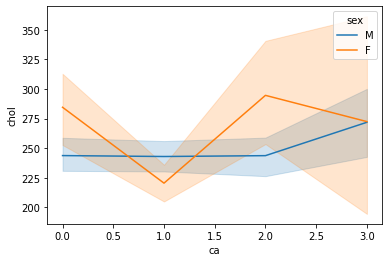

In [ ]:
# Plot the line graph
sns.lineplot(data= Chol_CA_MF, x='ca', y='chol', hue= 'sex')

In [ ]:
# Comment:
## From the observation above, the upward trending of number of vessels blocked and the cholesterol level for male group can be concluded with a has a positive relationship to one another.
## On the other hand, the group of female has different line chart. On average, the group of female possess larger risk of cholesterol to number of vessels blocked comparing to male.
## One important thing being captured by the line chart above is the range of cholesterol for female is larger than male given the condition of 2 and 3 numbers of vessels blocked.

**Part 13: Draw group of bar diagram of HR, BP, Total number of patients, based on age groups defined in Q9**

In [ ]:
Age31_Age40

,age,thalach,trestbps,chol
29,40.0,114.0,110.0,167.0
109,39.0,140.0,118.0,219.0
138,35.0,130.0,120.0,198.0
168,35.0,156.0,126.0,282.0
211,38.0,182.0,120.0,231.0
268,40.0,181.0,152.0,223.0


In [ ]:
# List all the age group
# List Age31_40
Group1= Age31_Age40
Group1_31_40= Group1[['age', 'thalach', 'trestbps']]
Group1_31_40

,age,thalach,trestbps
29,40.0,114.0,110.0
109,39.0,140.0,118.0
138,35.0,130.0,120.0
168,35.0,156.0,126.0
211,38.0,182.0,120.0
268,40.0,181.0,152.0


In [ ]:
# Calculate the average of thalach (HR) & trestbps (BP) for Age31_40
# Calcualte average HR
HR_3140_Sum= Group1['thalach'].sum()
HR_3140_Sum

Num_of_3140_HR= len(Group1)
Num_of_3140_HR

Avg31_40HR= HR_3140_Sum/ Num_of_3140_HR
Avg31_40HR

150.5

In [ ]:
# Calculate average of Blood Pressure
BP_3140_Sum= Group1['trestbps'].sum()
BP_3140_Sum

Num_of_3140_BP= len(Group1)
Num_of_3140_BP

Avg31_40BP= BP_3140_Sum/ Num_of_3140_HR
Avg31_40BP

124.33333333333333

In [ ]:
# Number of patients
print(Num_of_rows31_40)

6


In [ ]:
# List Age41_50
Group2= Age41_Age50
Group2_41_50= Group2[['age', 'thalach', 'trestbps']]
Group2_41_50

,age,thalach,trestbps
36,43.0,120.0,120.0
47,50.0,128.0,150.0
52,44.0,153.0,112.0
56,50.0,163.0,140.0
57,41.0,158.0,110.0
69,46.0,147.0,150.0
74,44.0,177.0,110.0
104,49.0,139.0,120.0
113,43.0,136.0,132.0
120,48.0,150.0,130.0


In [ ]:
# Calculate the average of thalach (HR) & trestbps (BP) for Age41_50
# Calcualte average HR
HR_4150_Sum= Group2['thalach'].sum()
HR_4150_Sum

Num_of_4150_HR= len(Group2)
Num_of_4150_HR

Avg41_50HR= HR_4150_Sum/ Num_of_4150_HR
Avg41_50HR

141.54545454545453

In [ ]:
# Calculate average of Blood Pressure
BP_4150_Sum= Group2['trestbps'].sum()
BP_4150_Sum

Num_of_4150_BP= len(Group2)
Num_of_4150_BP

Avg41_50BP= BP_4150_Sum/ Num_of_4150_HR
Avg41_50BP

126.27272727272727

In [ ]:
# Number of patients
print(Num_of_rows41_50)

22


In [ ]:
# List Age51_60
Group3= Age51_Age60
Group3_51_60= Group2[['age', 'thalach', 'trestbps']]
Group3_51_60

,age,thalach,trestbps
36,43.0,120.0,120.0
47,50.0,128.0,150.0
52,44.0,153.0,112.0
56,50.0,163.0,140.0
57,41.0,158.0,110.0
69,46.0,147.0,150.0
74,44.0,177.0,110.0
104,49.0,139.0,120.0
113,43.0,136.0,132.0
120,48.0,150.0,130.0


In [ ]:
# Calculate the average of thalach (HR) & trestbps (BP) for Age51_60
# Calcualte average HR
HR_5160_Sum= Group3['thalach'].sum()
HR_5160_Sum

Num_of_5160_HR= len(Group3)
Num_of_5160_HR

Avg51_60HR= HR_5160_Sum/ Num_of_5160_HR
Avg51_60HR

140.3125

In [ ]:
# Calculate average of Blood Pressure
BP_5160_Sum= Group3['trestbps'].sum()
BP_5160_Sum

Num_of_5160_BP= len(Group3)
Num_of_5160_BP

Avg51_60BP= BP_5160_Sum/ Num_of_5160_HR
Avg51_60BP

137.625

In [ ]:
# Number of patients
print(Num_of_rows51_60)

64


In [ ]:
# List Age61_70
Group4= Age61_Age70
Group4_61_70= Group4[['age', 'thalach', 'trestbps']]
Group4_61_70

,age,thalach,trestbps
1,67.0,108.0,160.0
2,67.0,129.0,120.0
8,63.0,147.0,130.0
32,64.0,158.0,140.0
40,65.0,114.0,150.0
44,61.0,169.0,130.0
71,67.0,163.0,125.0
72,62.0,99.0,120.0
73,65.0,158.0,110.0
83,68.0,150.0,180.0


In [ ]:
# Calculate the average of thalach (HR) & trestbps (BP) for Age61_70
# Calcualte average HR
HR_6170_Sum= Group4['thalach'].sum()
HR_6170_Sum

Num_of_6170_HR= len(Group4)
Num_of_6170_HR

Avg61_70HR= HR_6170_Sum/ Num_of_6170_HR
Avg61_70HR

132.94871794871796

In [ ]:
# Calculate average of Blood Pressure
BP_6170_Sum= Group4['trestbps'].sum()
BP_6170_Sum

Num_of_6170_BP= len(Group4)
Num_of_6170_BP

Avg61_70BP= BP_6170_Sum/ Num_of_6170_HR
Avg61_70BP

135.28205128205127

In [ ]:
# Number of patients
print(Num_of_rows61_70)

39


In [ ]:
# List Age71_80
Group5= Age71_Age80
Group5_71_80= Group5[['age', 'thalach', 'trestbps']]
Group5_71_80

,age,thalach,trestbps
161,77.0,162.0,125.0


In [ ]:
# Calculate the average of thalach (HR) & trestbps (BP) for Age71_80
# Calcualte average HR
HR_7180_Sum= Group5['thalach'].sum()
HR_7180_Sum

Num_of_7180_HR= len(Group5)
Num_of_7180_HR

Avg71_80HR= HR_7180_Sum/ Num_of_7180_HR
Avg71_80HR

162.0

In [ ]:
# Calculate average of Blood Pressure
BP_7180_Sum= Group5['trestbps'].sum()
BP_7180_Sum

Num_of_7180_BP= len(Group5)
Num_of_7180_BP

Avg71_80BP= BP_7180_Sum/ Num_of_7180_HR
Avg71_80BP

125.0

In [ ]:
# Number of patients
print(Num_of_rows71_80)

1


In [ ]:
# Summary of Heart Heart, Blood Pressure, and Number of Patients
Age_HRGroup= ([Avg31_40HR, Avg41_50HR, Avg51_60HR, Avg61_70HR, Avg71_80HR])
Age_HRGroup

[150.5, 141.54545454545453, 140.3125, 132.94871794871796, 162.0]

In [ ]:
Age_BPGroup= ([Avg31_40BP, Avg41_50BP, Avg51_60BP, Avg61_70BP, Avg71_80BP])
Age_BPGroup

[124.33333333333333, 126.27272727272727, 137.625, 135.28205128205127, 125.0]

In [ ]:
Number_patients= ([Num_of_rows31_40, Num_of_rows41_50, Num_of_rows51_60, Num_of_rows61_70, Num_of_rows71_80])
Number_patients

[6, 22, 64, 39, 1]

In [ ]:
# Creating a new dataframe theough the calculation
HRBPNum_of_Patients={'Age': ['3140', '4150', '5160', '6170', '7180'],
                     'Heart Rate': ['151', '142', '140', '133', '162'],
                     'Blood Pressure': ['124', '126', '138', '135', '125'],
                     'Num of Patients': ['6', '22', '64', '39', '1']}
new_df= pd.DataFrame(HRBPNum_of_Patients, columns= ['Age', 'Heart Rate', 'Blood Pressure', 'Num of Patients'])
new_df

,Age,Heart Rate,Blood Pressure,Num of Patients
0,3140,151,124,6
1,4150,142,126,22
2,5160,140,138,64
3,6170,133,135,39
4,7180,162,125,1


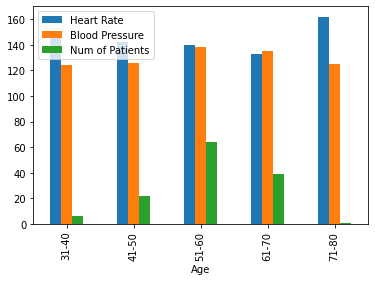

In [ ]:
data=[['31-40', 151, 124, 6],
      ['41-50', 142, 126, 22],
      ['51-60', 140, 138, 64],
      ['61-70', 133, 135, 39],
      ['71-80', 162, 125,1]
     ]
dataf= pd.DataFrame(data, columns =['Age', 'Heart Rate', 'Blood Pressure', 'Num of Patients'])
dataf.plot(x= 'Age', y=['Heart Rate', 'Blood Pressure', 'Num of Patients'], kind= 'bar')
plt.show()

In [ ]:
# Explaination of the observation
## From the observation above, it can be noticed that age group of 7180 has the highest heart rate in average across other age group.
## However, it does not seem realistic given the only one sample in the particular age group.
## By referring to the bar diagram above, it can not be concluded the positive correlation of age and blood pressure given the limited condition (external factors) is being provided.
## Of course, in the condition where work pressure is taking into consideration, upward trending of age and blood pressure seem reasonable.

**Part 14: Add 2 more columns named 'num male patients', 'num female patients' and having values of the numbers of male and female patients affected by heart disease in each age group respectively (based on question 9).**

In [ ]:
# Age Group (M)
Male_Age31_40

df3140= Age31_40
df3140_mul_index= df3140.set_index(['age'])
df3140_reindex= df3140_mul_index.reset_index()
df3140_reindex

# Adding a new column with the calculated number patients impacted
df3140_reindex['Num of Patients']= [1, 2, 3, 4, 5, 6]
df3140_reindex

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,state,Num of Patients
0,40.0,M,asp,110.0,167.0,no,2.0,114.0,1.0,2.0,2.0,0.0,7.0,3.0,1
1,39.0,M,asp,118.0,219.0,no,0.0,140.0,0.0,1.2,2.0,0.0,7.0,3.0,2
2,35.0,M,asp,120.0,198.0,no,0.0,130.0,1.0,1.6,2.0,0.0,7.0,1.0,3
3,35.0,M,asp,126.0,282.0,no,2.0,156.0,1.0,0.0,1.0,0.0,7.0,1.0,4
4,38.0,M,tap,120.0,231.0,no,0.0,182.0,1.0,3.8,2.0,0.0,7.0,4.0,5
5,40.0,M,asp,152.0,223.0,no,0.0,181.0,0.0,0.0,1.0,0.0,7.0,1.0,6


In [ ]:
# Age Group (M)
Male_Age41_50

df4150= Male_Age41_50
df4150_mul_index= df4150.set_index(['age'])
df4150_reindex= df4150_mul_index.reset_index()
df4150_reindex

# Adding a new column with the calculated number patients impacted
df4150_reindex['Num of Patients']= [1, 2, 3, 4, 5, 6,7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
df4150_reindex

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,state,Num of Patients
0,43.0,M,asp,120.0,177.0,no,2.0,120.0,1.0,2.5,2.0,0.0,7.0,3.0,1
1,50.0,M,asp,150.0,243.0,no,2.0,128.0,0.0,2.6,2.0,0.0,7.0,4.0,2
2,44.0,M,asp,112.0,290.0,no,2.0,153.0,0.0,0.0,1.0,1.0,3.0,2.0,3
3,50.0,M,nap,140.0,233.0,no,0.0,163.0,0.0,0.6,2.0,1.0,7.0,1.0,4
4,41.0,M,asp,110.0,172.0,no,2.0,158.0,0.0,0.0,1.0,0.0,7.0,1.0,5
5,46.0,M,nap,150.0,231.0,no,0.0,147.0,0.0,3.6,2.0,0.0,3.0,1.0,6
6,44.0,M,asp,110.0,197.0,no,2.0,177.0,0.0,0.0,1.0,1.0,3.0,1.0,7
7,49.0,M,nap,120.0,188.0,no,0.0,139.0,0.0,2.0,2.0,3.0,7.0,3.0,8
8,48.0,M,asp,130.0,256.0,yes,2.0,150.0,1.0,0.0,1.0,2.0,7.0,3.0,9
9,47.0,M,nap,108.0,243.0,no,0.0,152.0,0.0,0.0,1.0,0.0,3.0,1.0,10


In [ ]:
# Age Group (F)
Female_Age41_50

df4150F= Female_Age41_50
df4150F_mul_index= df4150F.set_index(['age'])
df4150F_reindex= df4150F_mul_index.reset_index()
df4150F_reindex

# Adding a new column with the calculated number patients impacted
df4150F_reindex['Num of Patients']= [1]
df4150F_reindex

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,state,Num of Patients
0,43.0,F,asp,132.0,341.0,yes,2.0,136.0,1.0,3.0,2.0,0.0,7.0,2.0,1


In [ ]:
# Age Group (M)
Male_Age51_60

df5160= Male_Age51_60
df5160_mul_index= df5160.set_index(['age'])
df5160_reindex= df5160_mul_index.reset_index()
df5160_reindex

# Adding a new column with the calculated number patients impacted
df5160_reindex['Num of Patients']= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]
df5160_reindex

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,state,Num of Patients
0,53.0,M,asp,140.0,203.0,yes,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1.0,1
1,56.0,M,nap,130.0,256.0,yes,2.0,142.0,1.0,0.6,2.0,1.0,6.0,2.0,2
2,58.0,M,aap,120.0,284.0,no,2.0,160.0,0.0,1.8,2.0,0.0,3.0,1.0,3
3,58.0,M,nap,132.0,224.0,no,2.0,173.0,0.0,3.2,1.0,2.0,7.0,3.0,4
4,60.0,M,asp,130.0,206.0,no,2.0,132.0,1.0,2.4,2.0,2.0,7.0,4.0,5
5,60.0,M,asp,117.0,230.0,yes,0.0,160.0,1.0,1.4,1.0,2.0,7.0,2.0,6
6,57.0,M,asp,150.0,276.0,no,2.0,112.0,1.0,0.6,2.0,1.0,6.0,1.0,7
7,55.0,M,asp,132.0,353.0,no,0.0,132.0,1.0,1.2,2.0,1.0,7.0,3.0,8
8,58.0,M,nap,112.0,230.0,no,2.0,165.0,0.0,2.5,2.0,1.0,7.0,4.0,9
9,60.0,M,asp,130.0,253.0,no,0.0,144.0,1.0,1.4,1.0,1.0,7.0,1.0,10


In [ ]:
# Age Group (F)
Female_Age51_60

df5160F= Female_Age51_60
df5160F_mul_index= df5160F.set_index(['age'])
df5160F_reindex= df5160F_mul_index.reset_index()
df5160F_reindex

# Adding a new column with the calculated number patients impacted
df5160F_reindex['Num of Patients']= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
df5160F_reindex

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,state,Num of Patients
0,51.0,F,asp,130.0,305.0,no,0.0,142.0,1.0,1.2,2.0,0.0,7.0,2.0,1
1,60.0,F,asp,150.0,258.0,no,2.0,157.0,0.0,2.6,2.0,2.0,7.0,3.0,2
2,56.0,F,asp,200.0,288.0,yes,2.0,133.0,1.0,4.0,3.0,2.0,7.0,3.0,3
3,59.0,F,asp,174.0,249.0,no,0.0,143.0,1.0,0.0,2.0,0.0,3.0,1.0,4
4,56.0,F,asp,134.0,409.0,no,2.0,150.0,1.0,1.9,2.0,2.0,7.0,2.0,5
5,60.0,F,asp,158.0,305.0,no,2.0,161.0,0.0,0.0,1.0,0.0,3.0,1.0,6
6,55.0,F,asp,180.0,327.0,no,1.0,117.0,1.0,3.4,2.0,0.0,3.0,2.0,7
7,58.0,F,aap,136.0,319.0,yes,2.0,152.0,0.0,0.0,1.0,2.0,3.0,3.0,8
8,55.0,F,asp,128.0,205.0,no,1.0,130.0,1.0,2.0,2.0,1.0,7.0,3.0,9
9,58.0,F,asp,170.0,225.0,yes,2.0,146.0,1.0,2.8,2.0,2.0,6.0,2.0,10


In [ ]:
# Age Group (M)
Male_Age61_70

df6170= Male_Age61_70
df6170_mul_index= df6170.set_index(['age'])
df6170_reindex= df6170_mul_index.reset_index()
df6170_reindex

# Adding a new column with the calculated number patients impacted
df6170_reindex['Num of Patients']= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
df6170_reindex

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,state,Num of Patients
0,67.0,M,asp,160.0,286.0,no,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0,1
1,67.0,M,asp,120.0,229.0,no,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0,2
2,63.0,M,asp,130.0,254.0,no,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2.0,3
3,64.0,M,nap,140.0,335.0,no,0.0,158.0,0.0,0.0,1.0,0.0,3.0,1.0,4
4,67.0,M,asp,125.0,254.0,yes,0.0,163.0,0.0,0.2,2.0,2.0,7.0,3.0,5
5,62.0,M,asp,120.0,267.0,no,0.0,99.0,1.0,1.8,2.0,2.0,7.0,1.0,6
6,65.0,M,asp,110.0,248.0,no,2.0,158.0,0.0,0.6,1.0,2.0,6.0,1.0,7
7,68.0,M,nap,180.0,274.0,yes,2.0,150.0,1.0,1.6,2.0,0.0,7.0,3.0,8
8,61.0,M,asp,120.0,260.0,no,0.0,140.0,1.0,3.6,2.0,1.0,7.0,2.0,9
9,63.0,M,asp,130.0,330.0,yes,2.0,132.0,1.0,1.8,1.0,3.0,7.0,3.0,10


In [ ]:
# Age Group (F)
Female_Age61_70

df5160F= Female_Age51_60
df5160F_mul_index= df5160F.set_index(['age'])
df5160F_reindex= df5160F_mul_index.reset_index()
df5160F_reindex

# Adding a new column with the calculated number patients impacted
df5160F_reindex['Num of Patients']= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
df5160F_reindex

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,state,Num of Patients
0,51.0,F,asp,130.0,305.0,no,0.0,142.0,1.0,1.2,2.0,0.0,7.0,2.0,1
1,60.0,F,asp,150.0,258.0,no,2.0,157.0,0.0,2.6,2.0,2.0,7.0,3.0,2
2,56.0,F,asp,200.0,288.0,yes,2.0,133.0,1.0,4.0,3.0,2.0,7.0,3.0,3
3,59.0,F,asp,174.0,249.0,no,0.0,143.0,1.0,0.0,2.0,0.0,3.0,1.0,4
4,56.0,F,asp,134.0,409.0,no,2.0,150.0,1.0,1.9,2.0,2.0,7.0,2.0,5
5,60.0,F,asp,158.0,305.0,no,2.0,161.0,0.0,0.0,1.0,0.0,3.0,1.0,6
6,55.0,F,asp,180.0,327.0,no,1.0,117.0,1.0,3.4,2.0,0.0,3.0,2.0,7
7,58.0,F,aap,136.0,319.0,yes,2.0,152.0,0.0,0.0,1.0,2.0,3.0,3.0,8
8,55.0,F,asp,128.0,205.0,no,1.0,130.0,1.0,2.0,2.0,1.0,7.0,3.0,9
9,58.0,F,asp,170.0,225.0,yes,2.0,146.0,1.0,2.8,2.0,2.0,6.0,2.0,10


In [ ]:
# Age Group (M)
Male_Age71_80

df7180= Male_Age71_80
df7180_mul_index= df7180.set_index(['age'])
df7180_reindex= df7180_mul_index.reset_index()
df7180_reindex

# Adding a new column with the calculated number patients impacted
df7180_reindex['Num of Patients']= [1]
df7180_reindex

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,state,Num of Patients
0,77.0,M,asp,125.0,304.0,no,2.0,162.0,1.0,0.0,1.0,3.0,3.0,4.0,1
